In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
df=pd.read_csv("/content/exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [6]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [8]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M') # Convert the 'date' column to datetime format



In [10]:
df.set_index('date', inplace=True) ## Set the 'date' column as the index



In [11]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


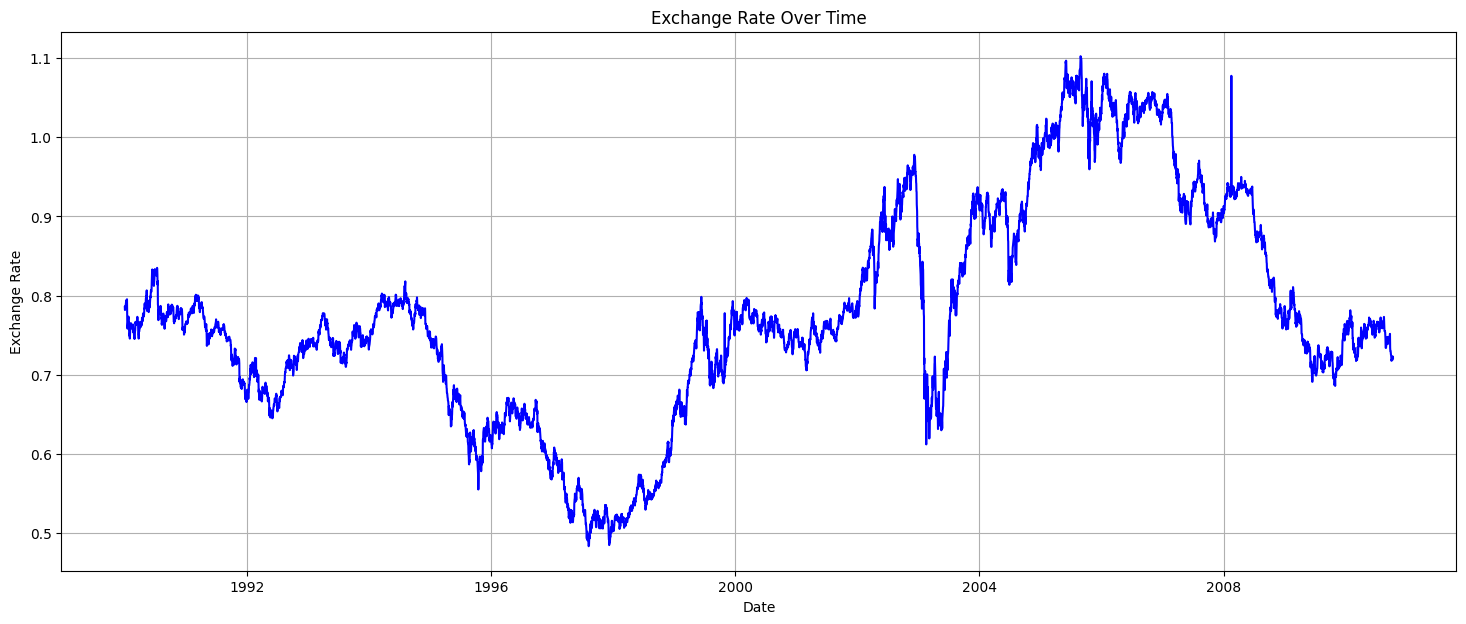

In [15]:
# Plot the time series data
plt.figure(figsize=(18, 7))
plt.plot(df['Ex_rate'], color='blue')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

In [17]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(df['Ex_rate'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


In [18]:
# We’ll fit an ARIMA model to the data
# Order of (p, d, q) can be determined by trial or using grid search; here we use (5, 1, 0) as an example
model = ARIMA(df['Ex_rate'], order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Wed, 04 Sep 2024   AIC                         -56099.370
Time:                        11:56:27   BIC                         -56057.765
Sample:                    01-01-1990   HQIC                        -56085.091
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

In [20]:
# Forecasting the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

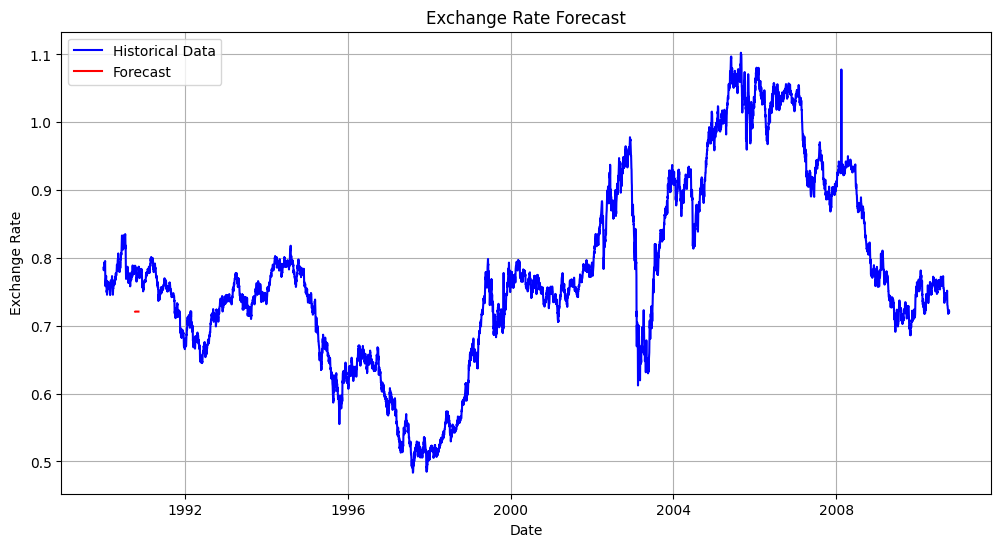

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate'], label='Historical Data', color='blue')
plt.plot(np.arange(len(df), len(df) + forecast_steps), forecast, label='Forecast', color='red')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [26]:
#Split the Data
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [27]:

# ARIMA Model
arima_model = ARIMA(train['Ex_rate'], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw_model = ExponentialSmoothing(train['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [30]:

# Forecasting the test period
arima_forecast = arima_model_fit.forecast(steps=len(test))
hw_forecast = hw_model.forecast(steps=len(test))


In [31]:

# Calculate evaluation metrics for ARIMA
arima_mae = mean_absolute_error(test['Ex_rate'], arima_forecast)
arima_mse = mean_squared_error(test['Ex_rate'], arima_forecast)
arima_rmse = np.sqrt(arima_mse)

In [32]:
# Calculate evaluation metrics for Holt-Winters
hw_mae = mean_absolute_error(test['Ex_rate'], hw_forecast)
hw_mse = mean_squared_error(test['Ex_rate'], hw_forecast)
hw_rmse = np.sqrt(hw_mse)


In [33]:
# Print the evaluation metrics
print("ARIMA Model Evaluation:")
print(f"MAE: {arima_mae}")
print(f"MSE: {arima_mse}")
print(f"RMSE: {arima_rmse}")

print("\nHolt-Winters Model Evaluation:")
print(f"MAE: {hw_mae}")
print(f"MSE: {hw_mse}")
print(f"RMSE: {hw_rmse}")


ARIMA Model Evaluation:
MAE: 0.17780239504335849
MSE: 0.04224693296003147
RMSE: 0.2055405871355618

Holt-Winters Model Evaluation:
MAE: 0.20675470865512963
MSE: 0.057259374063690714
RMSE: 0.23928931038324866


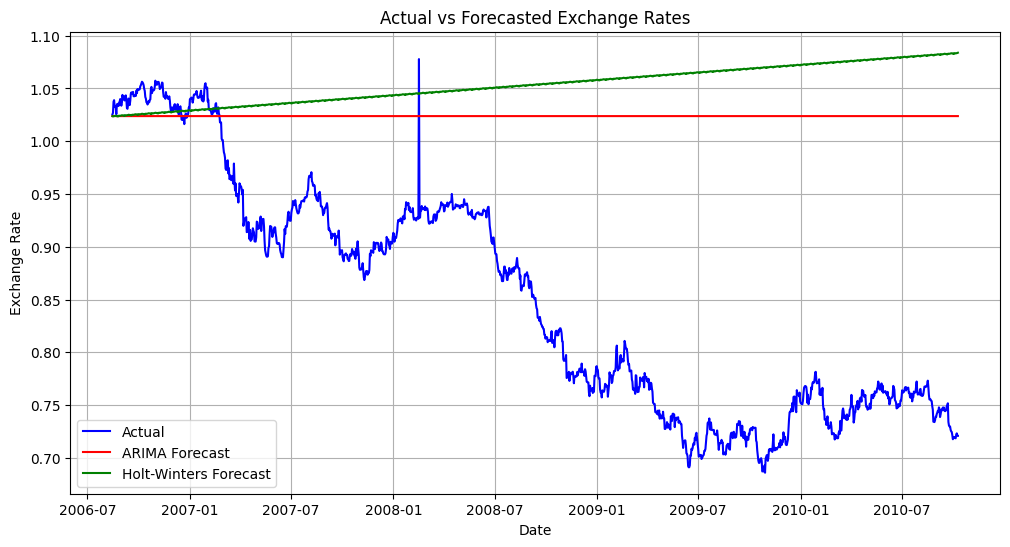

In [34]:
#Compare and Analyze
plt.figure(figsize=(12, 6))
plt.plot(test['Ex_rate'].index, test['Ex_rate'], label='Actual', color='blue')
plt.plot(test['Ex_rate'].index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test['Ex_rate'].index, hw_forecast, label='Holt-Winters Forecast', color='green')
plt.title('Actual vs Forecasted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()